# TXSA Part A

#### ~ Helper Function ~

In [3]:
helper_functions = [
    'DetectStopwords(token)',
    'DetectPunctuations(token)'
]

##### - detecting stopwords

In [4]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Justin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Get list of english stopwords
stop_words = set(stopwords.words('english'))

for sw in stop_words:
    print(sw)

o
hasn't
in
some
his
very
ve
ll
the
wouldn't
is
by
are
off
wasn't
y
their
am
you've
those
couldn't
me
should've
yourself
didn't
will
ma
through
s
ain
we
d
yourselves
she
on
against
this
into
after
not
nor
does
between
wasn
too
mustn
what
don't
he
himself
didn
above
ours
if
with
t
you're
just
why
most
itself
don
shan't
any
now
mustn't
her
shouldn't
so
mightn't
more
during
who
both
only
own
do
ourselves
re
when
aren
under
has
same
or
there
being
did
themselves
an
our
you
hers
down
such
having
whom
my
other
these
here
needn
up
herself
few
at
m
him
isn't
needn't
from
its
of
than
it's
hasn
that'll
where
had
before
hadn't
you'll
been
then
no
won't
below
which
weren't
about
wouldn
to
all
but
aren't
your
because
mightn
were
be
you'd
have
each
while
weren
over
shouldn
i
doing
again
doesn
out
for
further
isn
until
as
myself
she's
them
yours
couldn
they
doesn't
that
once
hadn
theirs
haven
it
was
how
haven't
won
should
and
can
shan
a


In [6]:
def DetectStopwords(token):
    if token in stop_words:
        return True
    else: return False

#### - detecting punctuations 

In [7]:
import string

In [8]:
punctuations = string.punctuation

punctuations = punctuations + '’'

def DetectPunctuations(token):
    if token in punctuations:
        return True
    else: return False

#### - Print Removed Stop words

In [9]:
def PrintRemovedSW(stopwords):
    i=0
    sw_count_dict = {}
    
    for sw in stopwords:
        if sw in sw_count_dict:
            sw_count_dict[sw] += 1
            continue
        
        sw_count_dict[sw] = 1
         
    print("Removed Stopwords:")
    for key,value in sw_count_dict.items():
        print(f'{i+1}. {key} ({value})')
        i+=1

#### - Print Details

In [10]:
def PrintDetails(tokens,sws,puncs):
    print(f'Total Tokens: {tokens}')
    print(f'Total Stop Words: {sws}')
    print(f'Total Punctuations: {puncs}')

## Q1. Form Tokenization and Filter stop words & punctuation 

In [11]:
# Read Data_1.txt

with open("../Data_1.txt","r") as file:
    lines = file.readlines()
    
print(lines)

file_line = lines[0]

print(file_line)

['Textual information in the world can be broadly categorized into two main types: facts and opinions. Facts are objective expressions about entities, events, and their properties. Opinions are usually subjective expressions that describe people’s sentiments, appraisals, or feelings toward entities, events, and their properties.']
Textual information in the world can be broadly categorized into two main types: facts and opinions. Facts are objective expressions about entities, events, and their properties. Opinions are usually subjective expressions that describe people’s sentiments, appraisals, or feelings toward entities, events, and their properties.


#### 1. Word Tokenization using **Split Function**

In [12]:
split_words = file_line.split(' ')

sf_tokens = 0
sf_sw = 0
sf_puncs = 0

for word in split_words:
    if DetectStopwords(word):
        sf_sw +=1
        
    if DetectPunctuations(word):
        sf_puncs +=1
    
    print(f'{sf_tokens+1}. {word}')
    sf_tokens+=1
    
print()
PrintDetails(sf_tokens,sf_sw,sf_puncs)

1. Textual
2. information
3. in
4. the
5. world
6. can
7. be
8. broadly
9. categorized
10. into
11. two
12. main
13. types:
14. facts
15. and
16. opinions.
17. Facts
18. are
19. objective
20. expressions
21. about
22. entities,
23. events,
24. and
25. their
26. properties.
27. Opinions
28. are
29. usually
30. subjective
31. expressions
32. that
33. describe
34. people’s
35. sentiments,
36. appraisals,
37. or
38. feelings
39. toward
40. entities,
41. events,
42. and
43. their
44. properties.

Total Tokens: 44
Total Stop Words: 15
Total Punctuations: 0


In [13]:
#code with removing stop words and punctuations

split_words = file_line.split(' ')

sf_tokens = 0
sf_sw = 0
sf_puncs = 0

sw_list = []

for word in split_words:
    if DetectStopwords(word):
        sf_sw +=1
        sw_list.append(word)
        continue
        
    if DetectPunctuations(word):
        sf_puncs +=1
        continue
    
    if word == split_words[0]:
        print("Tokens: ")
    
    print(f'{sf_tokens+1}. {word}')
    sf_tokens+=1
    
print()
PrintRemovedSW(sw_list)
print()
PrintDetails(sf_tokens,sf_sw,sf_puncs)

Tokens: 
1. Textual
2. information
3. world
4. broadly
5. categorized
6. two
7. main
8. types:
9. facts
10. opinions.
11. Facts
12. objective
13. expressions
14. entities,
15. events,
16. properties.
17. Opinions
18. usually
19. subjective
20. expressions
21. describe
22. people’s
23. sentiments,
24. appraisals,
25. feelings
26. toward
27. entities,
28. events,
29. properties.

Removed Stopwords:
1. in (1)
2. the (1)
3. can (1)
4. be (1)
5. into (1)
6. and (3)
7. are (2)
8. about (1)
9. their (2)
10. that (1)
11. or (1)

Total Tokens: 29
Total Stop Words: 15
Total Punctuations: 0


#### 2. Word Tokenization using **Regular Expression**

In [14]:
print(file_line)

Textual information in the world can be broadly categorized into two main types: facts and opinions. Facts are objective expressions about entities, events, and their properties. Opinions are usually subjective expressions that describe people’s sentiments, appraisals, or feelings toward entities, events, and their properties.


Note: 

1. ( ) 
- 

2. ?:  
- non-capturing group is a way to group part of a pattern without capturing the matched text. 
- Non-capturing groups are useful when you want to ***apply a quantifier*** to part of your regular expression, but you ***don't want*** to ***extract or capture*** that part of the matched text. 
- eg refer to example below (people's)
- ? can be replace to other quantifiers

In [15]:
import re

pattern = r"\b\w+(?:.\w)\b"

tokens = re.findall(pattern, file_line)

sw_list = []

re_tokens = 0
re_sw = 0
re_puncs = 0

for token in tokens:
    if DetectStopwords(token):
        re_sw +=1
        
    if DetectPunctuations(token):
        re_puncs +=1
    
    print(f'{re_tokens+1}. {token}')
    re_tokens+=1
    
print()
PrintDetails(re_tokens,re_sw,re_puncs)

1. Textual
2. information
3. the
4. world
5. can
6. broadly
7. categorized
8. into
9. two
10. main
11. types
12. facts
13. and
14. opinions
15. Facts
16. are
17. objective
18. expressions
19. about
20. entities
21. events
22. and
23. their
24. properties
25. Opinions
26. are
27. usually
28. subjective
29. expressions
30. that
31. describe
32. people’s
33. sentiments
34. appraisals
35. feelings
36. toward
37. entities
38. events
39. and
40. their
41. properties

Total Tokens: 41
Total Stop Words: 12
Total Punctuations: 0


In [16]:
import re

pattern = r"\b\w+(?:.\w)\b"

tokens = re.findall(pattern, file_line)

sw_list = []

re_tokens = 0
re_sw = 0
re_puncs = 0

for token in tokens:
    if DetectStopwords(token):
        re_sw +=1
        sw_list.append(token)
        continue
        
    if DetectPunctuations(token):
        re_puncs +=1
        continue
    
    if token == tokens[0]:
        print("Tokens: ")
    
    print(f'{re_tokens+1}. {token}')
    re_tokens+=1
    
print()
PrintRemovedSW(sw_list)
print()
PrintDetails(re_tokens,re_sw,re_puncs)

Tokens: 
1. Textual
2. information
3. world
4. broadly
5. categorized
6. two
7. main
8. types
9. facts
10. opinions
11. Facts
12. objective
13. expressions
14. entities
15. events
16. properties
17. Opinions
18. usually
19. subjective
20. expressions
21. describe
22. people’s
23. sentiments
24. appraisals
25. feelings
26. toward
27. entities
28. events
29. properties

Removed Stopwords:
1. the (1)
2. can (1)
3. into (1)
4. and (3)
5. are (2)
6. about (1)
7. their (2)
8. that (1)

Total Tokens: 29
Total Stop Words: 12
Total Punctuations: 0


##### Capturing & Non-Capturing exmaples

In [17]:
import re

# Input text
input_text = "Phone number: 123-4567"

# Regular expression pattern with capturing groups
pattern = r"(\d{3})-(\d{4})"

# Use re.search() to find the first match
match1 = re.search(pattern, input_text)
match2 = re.findall(pattern, input_text)

print('-'*5 + 'Using re.search()' + '-'*5)
print(match1.group)
print(match1.group(1))

print('\n'+'-'*5 + 'Using re.findall()' + '-'*5)
print(match2)
print(match2[0][0])

-----Using re.search()-----
<built-in method group of re.Match object at 0x000001FC3C8DB240>
123

-----Using re.findall()-----
[('123', '4567')]
123


In [18]:
import re

# Input text
input_text = "hello world hell0"

# Regular expression pattern with a capturing group
pattern1 = r"(?:hell)\w+"
pattern2 = r"ss(ab)"
pattern3 = r"(?:ab)"

# Use re.search() to find the first match
match1 = re.findall(pattern1, input_text)
match2 = re.findall(pattern2, input_text)
match3 = re.findall(pattern3, input_text)

print(match1)
print(match2)
print(match3)


['hello', 'hell0']
[]
[]


#### 3. Word Tokenisation using **NLTK packages**

In [19]:
print(file_line)

Textual information in the world can be broadly categorized into two main types: facts and opinions. Facts are objective expressions about entities, events, and their properties. Opinions are usually subjective expressions that describe people’s sentiments, appraisals, or feelings toward entities, events, and their properties.


In [20]:
import nltk
nltk.download('punkt')

# Some NLTK functions, including word_tokenize, require additional data files to be downloaded. 
# Hence, use nltk package to download using 'punkt'

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Justin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
from nltk.tokenize import word_tokenize

tokens = word_tokenize(file_line)

nltk_tokens = 0
nltk_sw = 0
nltk_puncs = 0

for token in tokens:
    if DetectStopwords(token):
        nltk_sw +=1
        
    if DetectStopwords(token):
        nltk_puncs +=1
    
    print(f'{nltk_tokens+1}. {token}')
    nltk_tokens+=1
    
print()
PrintDetails(nltk_tokens,nltk_sw,nltk_puncs)

1. Textual
2. information
3. in
4. the
5. world
6. can
7. be
8. broadly
9. categorized
10. into
11. two
12. main
13. types
14. :
15. facts
16. and
17. opinions
18. .
19. Facts
20. are
21. objective
22. expressions
23. about
24. entities
25. ,
26. events
27. ,
28. and
29. their
30. properties
31. .
32. Opinions
33. are
34. usually
35. subjective
36. expressions
37. that
38. describe
39. people
40. ’
41. s
42. sentiments
43. ,
44. appraisals
45. ,
46. or
47. feelings
48. toward
49. entities
50. ,
51. events
52. ,
53. and
54. their
55. properties
56. .

Total Tokens: 56
Total Stop Words: 16
Total Punctuations: 16


In [22]:
from nltk.tokenize import word_tokenize

tokens = word_tokenize(file_line)

nltk_tokens = 0
nltk_sw = 0
nltk_puncs = 0

sw_list = []

for token in tokens:
    if DetectStopwords(token):
        nltk_sw +=1
        sw_list.append(token)
        continue
        
    if DetectPunctuations(token):
        nltk_puncs +=1
        continue
    
    if token == tokens[0]:
        print("Tokens: ")
    
    print(f'{nltk_tokens+1}. {token}')
    nltk_tokens+=1
    
print()
PrintRemovedSW(sw_list)
print()
PrintDetails(nltk_tokens,nltk_sw,nltk_puncs)

Tokens: 
1. Textual
2. information
3. world
4. broadly
5. categorized
6. two
7. main
8. types
9. facts
10. opinions
11. Facts
12. objective
13. expressions
14. entities
15. events
16. properties
17. Opinions
18. usually
19. subjective
20. expressions
21. describe
22. people
23. sentiments
24. appraisals
25. feelings
26. toward
27. entities
28. events
29. properties

Removed Stopwords:
1. in (1)
2. the (1)
3. can (1)
4. be (1)
5. into (1)
6. and (3)
7. are (2)
8. about (1)
9. their (2)
10. that (1)
11. s (1)
12. or (1)

Total Tokens: 29
Total Stop Words: 16
Total Punctuations: 11


## Q2 - Form word stemming

##### 1. Word Stemming using **Regular Expression**

In [23]:
print(file_line)

Textual information in the world can be broadly categorized into two main types: facts and opinions. Facts are objective expressions about entities, events, and their properties. Opinions are usually subjective expressions that describe people’s sentiments, appraisals, or feelings toward entities, events, and their properties.


In [24]:
def stem(word):
    regexp = r'^(.*)(ing|ly|ed|ious|ies|ive|es|s|ment)?$'
    stem = re.findall(regexp,word)[0]
    return stem

In [25]:
tokens = word_tokenize(file_line)

count = 0 
for token in tokens:
    if DetectPunctuations(token):
        continue
    
    if len(token) == 1 and DetectStopwords(token):
        continue
    
    print(f'{count+1}. {stem(token)[0]}')
    count +=1

1. Textual
2. information
3. in
4. the
5. world
6. can
7. be
8. broadly
9. categorized
10. into
11. two
12. main
13. types
14. facts
15. and
16. opinions
17. Facts
18. are
19. objective
20. expressions
21. about
22. entities
23. events
24. and
25. their
26. properties
27. Opinions
28. are
29. usually
30. subjective
31. expressions
32. that
33. describe
34. people
35. sentiments
36. appraisals
37. or
38. feelings
39. toward
40. entities
41. events
42. and
43. their
44. properties


##### 2. Word Stemming using **Porter Stemmer**

In [26]:
import nltk

with open("../Data_1.txt", "r") as file:
    txt = file.read()

word = txt.lower().split()
print(word)

porter = nltk.PorterStemmer()
for t in word:
    print(porter.stem(t))

['textual', 'information', 'in', 'the', 'world', 'can', 'be', 'broadly', 'categorized', 'into', 'two', 'main', 'types:', 'facts', 'and', 'opinions.', 'facts', 'are', 'objective', 'expressions', 'about', 'entities,', 'events,', 'and', 'their', 'properties.', 'opinions', 'are', 'usually', 'subjective', 'expressions', 'that', 'describe', 'people’s', 'sentiments,', 'appraisals,', 'or', 'feelings', 'toward', 'entities,', 'events,', 'and', 'their', 'properties.']
textual
inform
in
the
world
can
be
broadli
categor
into
two
main
types:
fact
and
opinions.
fact
are
object
express
about
entities,
events,
and
their
properties.
opinion
are
usual
subject
express
that
describ
people’
sentiments,
appraisals,
or
feel
toward
entities,
events,
and
their
properties.


##### 3. Word Stemming using **Lancaster Stemmer**

In [27]:
import nltk
from nltk.tokenize import word_tokenize

with open("../Data_1.txt", "r") as file:
    txt = file.read()

word = word_tokenize(txt)

porter = nltk.PorterStemmer()
counter = 1  # Initialize a counter variable

for t in word:
    stemmed_word = porter.stem(t)
    print(f"{counter}. {stemmed_word}")
    counter += 1  # Increment the counter

1. textual
2. inform
3. in
4. the
5. world
6. can
7. be
8. broadli
9. categor
10. into
11. two
12. main
13. type
14. :
15. fact
16. and
17. opinion
18. .
19. fact
20. are
21. object
22. express
23. about
24. entiti
25. ,
26. event
27. ,
28. and
29. their
30. properti
31. .
32. opinion
33. are
34. usual
35. subject
36. express
37. that
38. describ
39. peopl
40. ’
41. s
42. sentiment
43. ,
44. apprais
45. ,
46. or
47. feel
48. toward
49. entiti
50. ,
51. event
52. ,
53. and
54. their
55. properti
56. .


## Q3 - Form Parts of Speech (POS) taggers & Syntactic Analysers 

In [28]:
# Read Data_2.txt

with open("../Data_2.txt","r") as file:
    lines = file.readlines()
    
print(lines)

file_line_2 = lines[0]

print(file_line_2)

['The big black dog barked at the white cat and chased away.']
The big black dog barked at the white cat and chased away.


##### 1.1 POS tagging using **NLTK POS tagger**

In [29]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

In [30]:
tokenized_text = word_tokenize(file_line_2)

nltk_pos_tg = nltk.pos_tag(tokenized_text)
print(nltk_pos_tg)

[('The', 'DT'), ('big', 'JJ'), ('black', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('white', 'JJ'), ('cat', 'NN'), ('and', 'CC'), ('chased', 'VBD'), ('away', 'RB'), ('.', '.')]


##### 1.2 POS tagging using **TextBlob POS tagger**

In [31]:
from textblob import TextBlob

# Sample text
with open("../Data_2.txt") as file:
    txt = file.read()
    
# Create a TextBlob object
blob = TextBlob(txt)

# Perform POS tagging using TextBlob
pos_tags = blob.tags

print("\nTextBlob POS Tagger:")
print(pos_tags)


TextBlob POS Tagger:
[('The', 'DT'), ('big', 'JJ'), ('black', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('white', 'JJ'), ('cat', 'NN'), ('and', 'CC'), ('chased', 'VBD'), ('away', 'RB')]


##### 1.3 POS tagging using **Regular Expression tagger**

In [32]:
patterns = [
    (r'.*ing$', 'VBG'),               # gerunds
    (r'.*ed$', 'VBD'),                # simple past
    (r'.*es$', 'VBZ'),                # 3rd singular present
    (r'.*ould$', 'MD'),               # modals
    (r'.*\'s$', 'NN$'),               # possessive nouns
    (r'.*s$', 'NNS'),                 # plural nouns
    (r'^-?[0-9]+(.[0.9]+)?$', 'CD'),  # cardinal numbers
    (r'.*', 'NN'),                    # nouns (default)
    (r'^\d+$', 'CD'),
    (r'.*ing$', 'VBG'),               # gerunds, i.e. wondering
    (r'.*ment$', 'NN'),               # i.e. wonderment
    (r'.*ful$', 'JJ')                 # i.e. wonderful
]

regexp_tagger = nltk.RegexpTagger(patterns)
tagger = nltk.tag.sequential.RegexpTagger(patterns)

with open("../Data_2.txt", "r") as file:
    txt = file.read()

text1 = word_tokenize(txt)
tagged_text = tagger.tag(text1)

print("RegexpTagger Output:")
for word, tag in tagged_text:
    print(f"Word: {word} \tPOS Tag: {tag}")


RegexpTagger Output:
Word: The 	POS Tag: NN
Word: big 	POS Tag: NN
Word: black 	POS Tag: NN
Word: dog 	POS Tag: NN
Word: barked 	POS Tag: VBD
Word: at 	POS Tag: NN
Word: the 	POS Tag: NN
Word: white 	POS Tag: NN
Word: cat 	POS Tag: NN
Word: and 	POS Tag: NN
Word: chased 	POS Tag: VBD
Word: away 	POS Tag: NN
Word: . 	POS Tag: NN


##### 3. **Parse Trees**

['The', 'big', 'black', 'dog', 'barked', 'at', 'the', 'white', 'cat', 'and', 'chased', 'away']


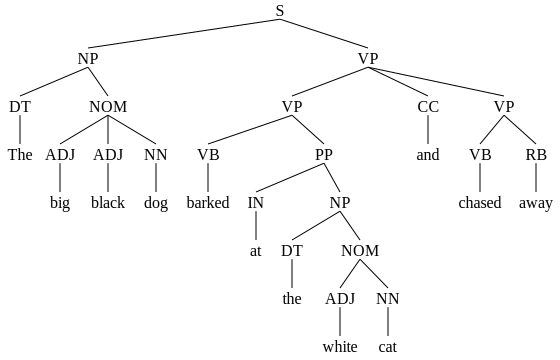

In [33]:
text2 = nltk.CFG.fromstring("""
S -> NP VP
NP -> DT NOM | DT NN
NOM -> ADJ ADJ NN | ADJ NN
VP -> VP CC VP | VB PP | VB RB | VB
PP -> IN NP
CC -> 'and'
VB -> 'chased' | 'barked'
DT -> 'The' | 'the'
ADJ -> 'big' | 'black' | 'white'
NN -> 'dog' | 'cat'
VBD -> 'barked' | 'chased'
IN -> 'at' 
RB -> 'away'
""")

with open('../Data_2.txt') as file:
    txt = file.read()

text1 = [word for word in word_tokenize(txt) if word.isalnum()]
print(text1)
parser = nltk.ChartParser(text2)
for tree1 in parser.parse(text1):
    display(tree1)

## Q4 - Work on Sentence Probabilities

##### - **Unsmoothed Bigram Model**

In [34]:
from nltk.lm.preprocessing import pad_both_ends, padded_everygram_pipeline
from nltk.util import bigrams

In [35]:
with open("../Data_3.txt","r") as file:
    lines = file.readlines()
    
for line in lines:
    print(line)

Training Corpus

~~~~~~~~~~~~~

<s> He read a book </s>

<s> I read a different book </s>

<s> He read a book by Danielle </s>



Calculate sentence probability for the following sentence

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

<s> I read a book by Danielle </s>


In [36]:
def Delete_S(text_corpus_list):
    new_list = []
    for token in text_corpus_list:
        if token == '<' or token == 's' or token == '>' or token == '/s':
            continue
        new_list.append(token)
    return new_list

In [37]:
training_corp_1 = lines[2]
training_corp_2 = lines[3]
training_corp_3 = lines[4]

test_corp = lines[8]

In [38]:
tokens_trc1 = nltk.tokenize.word_tokenize(training_corp_1.lower())
tokens_trc2 = nltk.tokenize.word_tokenize(training_corp_2.lower())
tokens_trc3 = nltk.tokenize.word_tokenize(training_corp_3.lower())
tokens_tec = nltk.tokenize.word_tokenize(test_corp.lower())

print(tokens_trc1)

['<', 's', '>', 'he', 'read', 'a', 'book', '<', '/s', '>']


In [39]:
# tokens of training corpus
tokens_trc1 = Delete_S(tokens_trc1)
tokens_trc2 = Delete_S(tokens_trc2)
tokens_trc3 = Delete_S(tokens_trc3)

#tokens of test corpus
tokens_tec = Delete_S(tokens_tec)

print(tokens_trc1)
print(tokens_trc2)
print(tokens_trc3)
print(tokens_tec)

['he', 'read', 'a', 'book']
['i', 'read', 'a', 'different', 'book']
['he', 'read', 'a', 'book', 'by', 'danielle']
['i', 'read', 'a', 'book', 'by', 'danielle']


In [40]:
# add start and end of text corpus in each sentence

padded_trc1 = list(bigrams(pad_both_ends(tokens_trc1, n=2)))
padded_trc2 = list(bigrams(pad_both_ends(tokens_trc2, n=2)))
padded_trc3 = list(bigrams(pad_both_ends(tokens_trc3, n=2)))
padded_tec = list(bigrams(pad_both_ends(tokens_tec, n=2)))

print(padded_trc1)
print(padded_trc2)
print(padded_trc3)
print(padded_tec)

[('<s>', 'he'), ('he', 'read'), ('read', 'a'), ('a', 'book'), ('book', '</s>')]
[('<s>', 'i'), ('i', 'read'), ('read', 'a'), ('a', 'different'), ('different', 'book'), ('book', '</s>')]
[('<s>', 'he'), ('he', 'read'), ('read', 'a'), ('a', 'book'), ('book', 'by'), ('by', 'danielle'), ('danielle', '</s>')]
[('<s>', 'i'), ('i', 'read'), ('read', 'a'), ('a', 'book'), ('book', 'by'), ('by', 'danielle'), ('danielle', '</s>')]


In [41]:
training_corpus_combined = []

training_corpus_combined.append(padded_trc1)
training_corpus_combined.append(padded_trc2)
training_corpus_combined.append(padded_trc3)

training_corpus_combined

[[('<s>', 'he'),
  ('he', 'read'),
  ('read', 'a'),
  ('a', 'book'),
  ('book', '</s>')],
 [('<s>', 'i'),
  ('i', 'read'),
  ('read', 'a'),
  ('a', 'different'),
  ('different', 'book'),
  ('book', '</s>')],
 [('<s>', 'he'),
  ('he', 'read'),
  ('read', 'a'),
  ('a', 'book'),
  ('book', 'by'),
  ('by', 'danielle'),
  ('danielle', '</s>')]]

In [42]:
padded_tec

[('<s>', 'i'),
 ('i', 'read'),
 ('read', 'a'),
 ('a', 'book'),
 ('book', 'by'),
 ('by', 'danielle'),
 ('danielle', '</s>')]

In [50]:
#biagram models for smoothed and unsmoothed conditions
def un_smoothed_bigram_models(training_corpus_combined,bigram_test_corpus,is_smoothed):
    
    probabilty_lst = []
    
    for bigram_test_corp in bigram_test_corpus:

        unique_words = []
        numerator = 0
        denominator = 0
        
        for training_corpus in training_corpus_combined:
            for bigram_train_corp in training_corpus:
                if bigram_train_corp == bigram_test_corp:
                    numerator+=1
                
                if bigram_train_corp[0] == bigram_test_corp[0]:
                    denominator+=1
                    
                if bigram_train_corp[0] not in unique_words:
                    unique_words.append(bigram_train_corp[0])
                
                if bigram_train_corp[1] not in unique_words:
                    unique_words.append(bigram_train_corp[1])
        
        probabilty = numerator/denominator if is_smoothed == False else (numerator)/((denominator)+len(unique_words)) #include <s> and </s>
        
        probabilty_lst.append(probabilty)
        
    prob_multiplication = 0
        
    for probabilty in probabilty_lst:
        
        if prob_multiplication == 0:
            prob_multiplication+=probabilty
            continue
        
        prob_multiplication*=probabilty
        
    return prob_multiplication
        
            

In [51]:
un_smoothed_bigram_models(training_corpus_combined,padded_tec,False)

0.07407407407407407

In [52]:
un_smoothed_bigram_models(training_corpus_combined,padded_tec,True)

1.5783371749621749e-07